# Code to parse `.fit` files

In [2]:
import csv
import os
import fitparse
import pytz

In [3]:
allowed_fields = ['utc_timestamp','position_lat','position_long', 'distance',
'enhanced_altitude', 'altitude','enhanced_speed',
                 'speed', 'heart_rate','cadence','fractional_cadence']
required_fields = ['utc_timestamp', 'position_lat', 'position_long']

UTC = pytz.UTC
CST = pytz.timezone('US/Central')


def main(path='.'):
    files = os.listdir(path)
    fit_files = [file for file in files if file[-4:].lower()=='.fit']
    for file in fit_files:
        new_filename = path + file[:-4] + '.csv'
        if os.path.exists(new_filename):
            #print('%s already exists. skipping.' % new_filename)
            continue
        fitfile = fitparse.FitFile(path + file,  
            data_processor=fitparse.StandardUnitsDataProcessor())
        
        print('converting %s' % file)
        write_fitfile_to_csv(fitfile, new_filename)
    print('finished conversions')


def write_fitfile_to_csv(fitfile, output_file='test_output.csv'):
    messages = fitfile.messages
    data = []
    for m in messages:
        skip=False
        if not hasattr(m, 'fields'):
            continue
        fields = m.fields
        #check for important data types
        mdata = {}
        for field in fields:
            if field.name in allowed_fields:
                if field.name == 'utc_timestamp':
                    mdata[field.name] = UTC.localize(field.value)#.astimezone(CST)
                else:
                    mdata[field.name] = field.value
        for rf in required_fields:
            if rf not in mdata:
                skip = True
        if not skip:
            data.append(mdata)
    #write to csv
    with open(output_file, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(allowed_fields)
        for entry in data:
            writer.writerow([ str(entry.get(k, '')) for k in allowed_fields])
    print('wrote %s' % output_file)

In [102]:
!rm ../jrc/kostas/sample/back/2019-07-01-16-45-33.csv

rm: ../jrc/kostas/sample/back/2019-07-01-16-45-33.csv: No such file or directory


In [30]:
import datetime
dt = "8/8/2013 4:05:03 PM"
unaware_est = datetime.datetime.strptime(dt,"%m/%d/%Y %I:%M:%S %p")
localtz = pytz.timezone('CET')
aware_est = localtz.localize(unaware_est)
aware_est
#aware_est.astimezone(pytz.)

datetime.datetime(2013, 8, 8, 16, 5, 3, tzinfo=<DstTzInfo 'CET' CEST+2:00:00 DST>)

# Back car

In [4]:
main(path='../jrc/kostas/sample/back/')

finished conversions


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../jrc/kostas/sample/back/2019-07-01-16-45-33.csv')

In [7]:
df.head()

,utc_timestamp,position_lat,position_long,distance,enhanced_altitude,altitude,enhanced_speed,speed,heart_rate,cadence,fractional_cadence
0,2019-07-01 14:45:39+00:00,57.786787,12.770023,NaN,178.8,NaN,11.0556,NaN,NaN,NaN,NaN
1,2019-07-01 14:45:39+00:00,57.786787,12.770024,NaN,178.8,NaN,11.3256,NaN,NaN,NaN,NaN
2,2019-07-01 14:45:39+00:00,57.786783,12.770022,NaN,178.8,NaN,11.4408,NaN,NaN,NaN,NaN
3,2019-07-01 14:45:39+00:00,57.786775,12.770018,NaN,178.8,NaN,11.6280,NaN,NaN,NaN,NaN
4,2019-07-01 14:45:39+00:00,57.786772,12.770013,NaN,178.8,NaN,11.8332,NaN,NaN,NaN,NaN


In [8]:
df.shape

(1161, 11)

In [9]:
df.utc_timestamp.min(), df.utc_timestamp.max()

('2019-07-01 14:45:39+00:00', '2019-07-01 14:47:35+00:00')

# Front car

In [110]:
main(path='../jrc/kostas/sample/front/')

converting 2026-01-01-08-42-56.fit
wrote ../jrc/kostas/sample/front/2026-01-01-08-42-56.csv
finished conversions


In [10]:
df_f = pd.read_csv('../jrc/kostas/sample/front/2026-01-01-08-42-56.csv')

In [11]:
df_f.head()

,utc_timestamp,position_lat,position_long,distance,enhanced_altitude,altitude,enhanced_speed,speed,heart_rate,cadence,fractional_cadence
0,2019-07-01 13:50:41+00:00,57.786612,12.769824,NaN,193.4,NaN,0.0,NaN,NaN,NaN,NaN
1,2019-07-01 13:50:41+00:00,57.786612,12.769825,NaN,193.4,NaN,0.0,NaN,NaN,NaN,NaN
2,2019-07-01 13:50:41+00:00,57.786611,12.769825,NaN,193.4,NaN,0.0,NaN,NaN,NaN,NaN
3,2019-07-01 13:50:41+00:00,57.786611,12.769825,NaN,193.4,NaN,0.0,NaN,NaN,NaN,NaN
4,2019-07-01 13:50:41+00:00,57.786610,12.769826,NaN,193.6,NaN,0.0,NaN,NaN,NaN,NaN


In [12]:
df_f.shape

(40644, 11)

In [13]:
df_f.utc_timestamp.min(), df_f.utc_timestamp.max()

('2019-07-01 13:50:41+00:00', '2019-07-01 14:58:25+00:00')

# Merge

In [14]:
cols = ['utc_timestamp',
        'position_lat',
        'position_long',
        'enhanced_altitude',
        'enhanced_speed']

In [15]:
df_m = pd.merge(df[cols], df_f[cols], on='utc_timestamp',
                how='left', suffixes=['_b', '_f'])

In [16]:
df_m.head()

,utc_timestamp,position_lat_b,position_long_b,enhanced_altitude_b,enhanced_speed_b,position_lat_f,position_long_f,enhanced_altitude_f,enhanced_speed_f
0,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782658,12.775736,186.6,0.0
1,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775736,186.6,0.0
2,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775735,186.4,0.0
3,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775735,186.4,0.0
4,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775734,186.4,0.0


In [17]:
df_m.shape

(11610, 9)

# Compute distance

In [18]:
import numpy as np

In [19]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [20]:
df_m['dist'] = haversine(df_m.position_long_b, df_m.position_lat_b,
                         df_m.position_long_f, df_m.position_lat_f)

In [21]:
df_m.head(20)

,utc_timestamp,position_lat_b,position_long_b,enhanced_altitude_b,enhanced_speed_b,position_lat_f,position_long_f,enhanced_altitude_f,enhanced_speed_f,dist
0,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782658,12.775736,186.6,0.0,0.777206
1,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775736,186.6,0.0,0.777142
2,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775735,186.4,0.0,0.777080
3,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775735,186.4,0.0,0.777024
4,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782659,12.775734,186.4,0.0,0.776945
5,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782660,12.775734,186.4,0.0,0.776883
6,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782660,12.775733,186.4,0.0,0.776827
7,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782660,12.775733,186.2,0.0,0.776763
8,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782660,12.775733,186.2,0.0,0.776763
9,2019-07-01 14:45:39+00:00,57.786787,12.770023,178.8,11.0556,57.782660,12.775733,186.2,0.0,0.776763


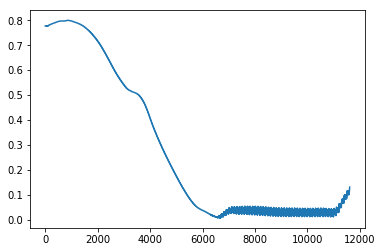

In [23]:
df_m.dist.plot()

In [24]:
df_m.iloc[6500::100, 9].shape

(52,)

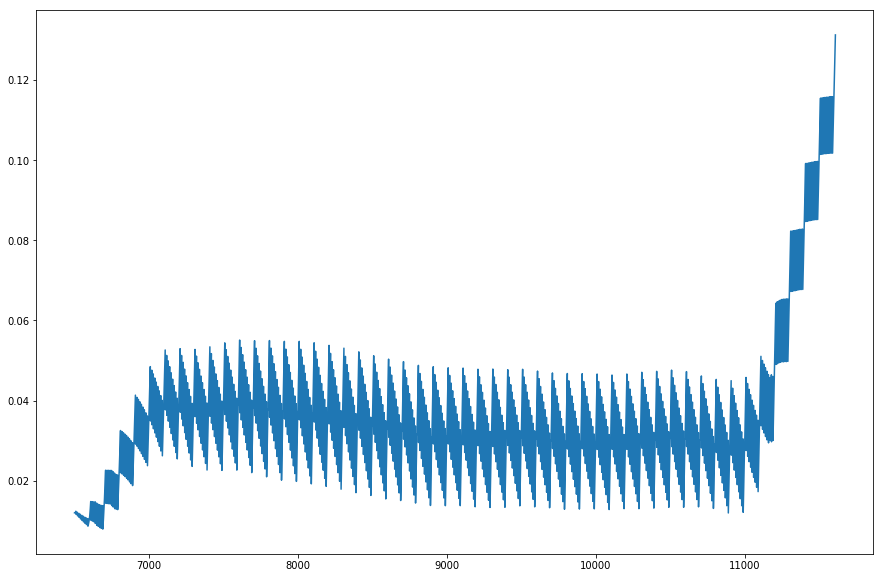

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(df_m.iloc[6500::, 9].index, df_m.iloc[6500::, 9])

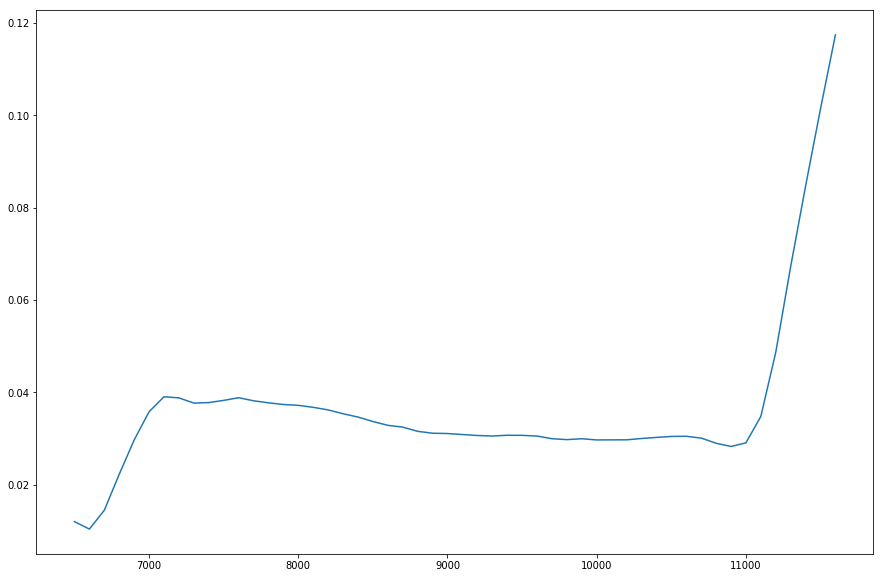

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(df_m.iloc[6500::100, 9].index, df_m.iloc[6500::100, 9])

In [27]:
df_m.dist.min()

0.007959284108618217

In [31]:
df_m.utc_timestamp.iloc[1500:1502]

1500    2019-07-01 14:45:54+00:00
1501    2019-07-01 14:45:54+00:00
Name: utc_timestamp, dtype: object

In [29]:
df_m[df_m.utc_timestamp == '2019-07-01 14:46:45+00:00']

,utc_timestamp,position_lat_b,position_long_b,enhanced_altitude_b,enhanced_speed_b,position_lat_f,position_long_f,enhanced_altitude_f,enhanced_speed_f,dist
6600,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782748,12.775690,186.4,16.1892,0.010404
6601,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782751,12.775686,186.4,16.6464,0.010742
6602,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782755,12.775682,186.4,17.1000,0.011121
6603,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782759,12.775677,186.4,17.6220,0.011544
6604,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782763,12.775672,186.4,18.1872,0.011993
6605,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782768,12.775666,186.4,18.8136,0.012514
6606,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782772,12.775661,186.4,19.3752,0.013055
6607,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782776,12.775655,186.4,19.9476,0.013619
6608,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782781,12.775649,186.4,20.4696,0.014230
6609,2019-07-01 14:46:45+00:00,57.782653,12.775677,188.6,10.1664,57.782785,12.775643,186.4,20.5416,0.014828
